In [5]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

## Extração dos Dados

In [7]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
dados.shape

(7267, 6)

#

## Exploração e Transformação dos Dados

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
for i in ['customer', 'customer', 'internet', 'account']:
    print(f'{i}: {dados[i][0]}\n')


customer: {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

customer: {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

internet: {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}

account: {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}



In [11]:
subs_dfs = {
    'churn' : dados[['customerID', 'Churn']],
    'consumidor' : pd.json_normalize(dados['customer']),
    'phone' :  pd.json_normalize(dados['phone']),
    'internet' : pd.json_normalize(dados['internet']),
    'account' : pd.json_normalize(dados['account'])    
}

In [12]:
for i,k in subs_dfs.items():
    print(f'{i}: {k.shape}')

churn: (7267, 2)
consumidor: (7267, 5)
phone: (7267, 2)
internet: (7267, 7)
account: (7267, 5)


In [13]:
df = pd.concat(list(subs_dfs.values()), axis=1)

In [14]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df.head(3))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [15]:
df.shape

(7267, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [17]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

In [18]:
print('COLUNAs COM VALORES VAZIOS')
for coluna in list(df.columns):
    if df[coluna].dtype == object:
        if df[coluna].str.strip().eq('').sum() > 0:
            print(f'{coluna} : {df[coluna].str.strip().eq("").sum()}')


COLUNAs COM VALORES VAZIOS
Churn : 224
Charges.Total : 11


In [19]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df[df['Charges.Total'].str.strip().eq("") == 1])

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [20]:
# Aparentemente os clientes sem valores no total gasto, são clientes novos
# deste modo optou-se por adicionar o valor 0.
mascara = df['Charges.Total'].astype(str).str.strip() == ""
df.loc[mascara, 'Charges.Total'] = 0

In [21]:
df[df['Charges.Total'].str.strip().eq("") == 1]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [22]:
df[df['Charges.Total'] == 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0


In [23]:
df['Charges.Total'] = df['Charges.Total'].astype(float)

In [24]:
df['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7267 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [25]:
print(f'Total de clientes: {df['customerID'].size}')
print(f'CLientes duplicados: {df['customerID'].duplicated().sum()}')
print(f'Clientes Unicos: {df['customerID'].nunique()}')

Total de clientes: 7267
CLientes duplicados: 0
Clientes Unicos: 7267


In [26]:
colunas = list(df.columns)
for i in colunas[1:]:
    print(f'{df.groupby(i).size()}\n')

Churn
        224
No     5174
Yes    1869
dtype: int64

gender
Female    3592
Male      3675
dtype: int64

SeniorCitizen
0    6085
1    1182
dtype: int64

Partner
No     3749
Yes    3518
dtype: int64

Dependents
No     5086
Yes    2181
dtype: int64

tenure
0      11
1     634
2     246
3     207
4     185
     ... 
68    104
69    100
70    122
71    176
72    369
Length: 73, dtype: int64

PhoneService
No      707
Yes    6560
dtype: int64

MultipleLines
No                  3495
No phone service     707
Yes                 3065
dtype: int64

InternetService
DSL            2488
Fiber optic    3198
No             1581
dtype: int64

OnlineSecurity
No                     3608
No internet service    1581
Yes                    2078
dtype: int64

OnlineBackup
No                     3182
No internet service    1581
Yes                    2504
dtype: int64

DeviceProtection
No                     3195
No internet service    1581
Yes                    2491
dtype: int64

TechSupport
No          

In [27]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df[df['Churn'].str.strip().eq("") == 1].head(50))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
219,0328-IBUPK,,Female,0,Yes,Yes,51,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),34.20,1782.00
312,0448-YZNZE,,Male,1,Yes,No,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.55,2510.20
351,0510-EXSMQ,,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.05,651.50
368,0530-HBKHZ,,Female,1,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
374,0534-JRNIG,,Female,0,No,No,6,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40


In [28]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df[df['Churn'].str.strip().eq("") == 1].tail(50))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6013,8212-FSQIV,,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25
6045,8256-ERHVS,,Male,0,No,No,9,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.25,576.95
6046,8256-TWSNM,,Male,0,Yes,Yes,6,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,377.85
6069,8289-DXCFQ,,Female,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.10,50.10
6109,8353-CFNVI,,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55
6126,8386-OSYMC,,Female,0,Yes,Yes,58,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.20,6225.40
6207,8530-KXSOX,,Male,0,Yes,No,68,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.25,1728.20
6291,8649-VYTUC,,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.35,2238.50
6346,8732-BBLMG,,Female,0,No,No,5,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),50.95,229.40
6373,8754-GZCEH,,Female,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.15,2395.70


In [29]:
# Visualmente nao foi encontrado um padrão para explicar os valores ausentes da coluna Churn
# Desse modo optou-se por exclui-los
df = df[~df['Churn'].str.strip().eq("") == 1]

In [30]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [31]:
df.shape

(7043, 21)

In [32]:
# Alterando valores para informações somente referentes a coluna
df['MultipleLines'].replace({'No phone service': 'No'}, inplace = True)
df['OnlineSecurity'].replace({'No internet service': 'No'}, inplace = True)
df['OnlineBackup'].replace({'No internet service': 'No'}, inplace = True)
df['DeviceProtection'].replace({'No internet service': 'No'}, inplace = True)
df['TechSupport'].replace({'No internet service': 'No'}, inplace = True)
df['StreamingTV'].replace({'No internet service': 'No'}, inplace = True)
df['StreamingMovies'].replace({'No internet service': 'No'}, inplace = True)

In [33]:
for i in colunas[1:]:
    print(f'{df.groupby(i).size()}\n')

Churn
No     5174
Yes    1869
dtype: int64

gender
Female    3488
Male      3555
dtype: int64

SeniorCitizen
0    5901
1    1142
dtype: int64

Partner
No     3641
Yes    3402
dtype: int64

Dependents
No     4933
Yes    2110
dtype: int64

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Length: 73, dtype: int64

PhoneService
No      682
Yes    6361
dtype: int64

MultipleLines
No     4072
Yes    2971
dtype: int64

InternetService
DSL            2421
Fiber optic    3096
No             1526
dtype: int64

OnlineSecurity
No     5024
Yes    2019
dtype: int64

OnlineBackup
No     4614
Yes    2429
dtype: int64

DeviceProtection
No     4621
Yes    2422
dtype: int64

TechSupport
No     4999
Yes    2044
dtype: int64

StreamingTV
No     4336
Yes    2707
dtype: int64

StreamingMovies
No     4311
Yes    2732
dtype: int64

Contract
Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

PaperlessBilling
No  

In [34]:
# Aplicando one-hot-encoding a coluna InternetService
df['DSL_Service'] = ['Yes' if x == 'DSL' else 'No' for x in df['InternetService']]
df['FibetOptic_Service'] = ['Yes' if x == 'Fiber optic' else 'No' for x in df['InternetService']]

In [35]:
df.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DSL_Service,FibetOptic_Service
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,Yes,No


In [36]:
df['InternetService'] = df['InternetService'].replace({'DSL' : 'Yes', 'Fiber optic' : 'Yes'})

In [37]:
df.groupby('InternetService').size()

InternetService
No     1526
Yes    5517
dtype: int64

In [38]:
df.reset_index(drop = True, inplace = True)

In [39]:
# Criação da coluna Contas_Diarias
df['Contas_Diarias'] = [round(x / 30, 2) for x in df['Charges.Monthly']]
df.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DSL_Service,FibetOptic_Service,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.6,593.3,Yes,No,2.19


#### Padronizando o DF

In [40]:
# Organizando as colunas, primeiras colunas informações de Churn e sobre os clientes
# colunas do meio sobre os serviços contratados, colunas finais sobre cobranças
df = pd.concat([df.iloc[:, :6],
                df.iloc[:, 7:10],
                df.iloc[:, 21:23],
                df.iloc[:, 10:16],           
                df['PaperlessBilling'],
                df['Contract'],
                df['tenure'],
                df['PaymentMethod'],
                df['Contas_Diarias'],           
                df['Charges.Monthly'],
                df['Charges.Total']],
                axis = 1)

In [41]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df.head(1))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,DSL_Service,FibetOptic_Service,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contract,tenure,PaymentMethod,Contas_Diarias,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,One year,9,Mailed check,2.19,65.6,593.3


In [42]:
# Traduzindo os valores das colunas gender, Contract, PaymentMethod
df['gender'] = df.gender.replace({'Female' : 'Feminino', 'Male' : 'Masculino'})
df['Contract'] = df.Contract.replace({'Month-to-month' : 'Mensal', 'One year' : 'Anual', 'Two year' : 'Bienal'})
df['PaymentMethod'] = df.PaymentMethod.replace({'Bank transfer (automatic)' : 'Transferencia Bancaria (AUTO)',
                                                'Credit card (automatic)' : 'Cartão de Credito (AUTO)', 
                                                'Electronic check' : 'Cheque Eletronico',
                                                'Mailed check': 'Cheque p/ Correio'
                                               })

In [43]:
for i in ['gender', 'Contract', 'PaymentMethod']:
    print(df.groupby(i).size(), '\n')

gender
Feminino     3488
Masculino    3555
dtype: int64 

Contract
Anual     1473
Bienal    1695
Mensal    3875
dtype: int64 

PaymentMethod
Cartão de Credito (AUTO)         1522
Cheque Eletronico                2365
Cheque p/ Correio                1612
Transferencia Bancaria (AUTO)    1544
dtype: int64 



In [44]:
colunas = list(df.columns)

In [45]:
colunas[4:18]

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'DSL_Service',
 'FibetOptic_Service',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [46]:
# Optou - se por tranformar as colunas com valores binarios em valores boleanos.
df['SeniorCitizen'] = df['SeniorCitizen'] == 1
df['Churn'] = df['Churn'] == 'Yes'
for i in colunas[4:18]:
    df[i] = df[i] == 'Yes'

In [47]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,DSL_Service,FibetOptic_Service,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contract,tenure,PaymentMethod,Contas_Diarias,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Feminino,False,True,True,True,False,True,True,False,False,True,False,True,True,False,True,Anual,9,Cheque p/ Correio,2.19,65.6,593.30
1,0003-MKNFE,False,Masculino,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,Mensal,9,Cheque p/ Correio,2.00,59.9,542.40
2,0004-TLHLJ,True,Masculino,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,Mensal,4,Cheque Eletronico,2.46,73.9,280.85
3,0011-IGKFF,True,Masculino,True,True,False,True,False,True,False,True,False,True,True,False,True,True,True,Mensal,13,Cheque Eletronico,3.27,98.0,1237.85
4,0013-EXCHZ,True,Feminino,True,True,False,True,False,True,False,True,False,False,False,True,True,False,True,Mensal,3,Cheque p/ Correio,2.80,83.9,267.40


In [48]:
# Renomeando as colunas para melhor compreensão
df = df.rename(columns = {'customerID': 'ID_cliente',
                          'Churn' : 'churn',
                          'gender' : 'genero',
                          'SeniorCitizen' : 'idoso',
                          'Partner' : 'possui_parceiro',
                          'Dependents': 'possui_dependentes' ,
                          'PhoneService' : 'servico_telefonico',
                          'MultipleLines' : 'multiplas_linhas', 
                          'InternetService' : 'servico_internet',
                          'DSL_Service' : 'DSL',
                          'FibetOptic_Service' : 'fibra_otica',
                          'OnlineSecurity' : 'segurança_online',
                          'OnlineBackup' : 'backup_online',
                          'DeviceProtection' : 'protecao_do_dispositivo',
                          'TechSupport' : 'suporte_tecnico',
                          'StreamingTV': 'TV_cabo',
                          'StreamingMovies' : 'streaming_filmes',
                          'PaperlessBilling' : 'fatura_online',
                          'Contract' : 'tipo_contrato',
                          'tenure' : 'tempo_contrato',
                          'PaymentMethod' : 'metodo_pagamento',
                          'Contas_Diarias' : 'contas_diarias',
                          'Charges.Monthly' : 'conta_mensal',
                          'Charges.Total' : 'total_gasto'})

In [49]:
df.columns

Index(['ID_cliente', 'churn', 'genero', 'idoso', 'possui_parceiro',
       'possui_dependentes', 'servico_telefonico', 'multiplas_linhas',
       'servico_internet', 'DSL', 'fibra_otica', 'segurança_online',
       'backup_online', 'protecao_do_dispositivo', 'suporte_tecnico',
       'TV_cabo', 'streaming_filmes', 'fatura_online', 'tipo_contrato',
       'tempo_contrato', 'metodo_pagamento', 'contas_diarias', 'conta_mensal',
       'total_gasto'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_cliente               7043 non-null   object 
 1   churn                    7043 non-null   bool   
 2   genero                   7043 non-null   object 
 3   idoso                    7043 non-null   bool   
 4   possui_parceiro          7043 non-null   bool   
 5   possui_dependentes       7043 non-null   bool   
 6   servico_telefonico       7043 non-null   bool   
 7   multiplas_linhas         7043 non-null   bool   
 8   servico_internet         7043 non-null   bool   
 9   DSL                      7043 non-null   bool   
 10  fibra_otica              7043 non-null   bool   
 11  segurança_online         7043 non-null   bool   
 12  backup_online            7043 non-null   bool   
 13  protecao_do_dispositivo  7043 non-null   bool   
 14  suporte_tecnico         

#

## Análise

In [51]:
df.describe()

,tempo_contrato,contas_diarias,conta_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158697,64.761692,2279.734304
std,24.559481,1.002991,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [52]:
colunas = list(df.describe().columns)

print(5 * '*',' Análise Descritiva ', 5 * '*','\n')
for i in colunas:
    print(f'{i.upper()}:')
    print(f'Minimo: {df[i].min():.2f}')
    print(f'Maximo: {df[i].max():.2f}')
    print(f'Média: {df[i].mean():.2f}')
    print(f'Mediana: {df[i].median():.2f}')
    print(f'Desvio Padrão: {df[i].std():.2f}\n')  

*****  Análise Descritiva  ***** 

TEMPO_CONTRATO:
Minimo: 0.00
Maximo: 72.00
Média: 32.37
Mediana: 29.00
Desvio Padrão: 24.56

CONTAS_DIARIAS:
Minimo: 0.61
Maximo: 3.96
Média: 2.16
Mediana: 2.34
Desvio Padrão: 1.00

CONTA_MENSAL:
Minimo: 18.25
Maximo: 118.75
Média: 64.76
Mediana: 70.35
Desvio Padrão: 30.09

TOTAL_GASTO:
Minimo: 0.00
Maximo: 8684.80
Média: 2279.73
Mediana: 1394.55
Desvio Padrão: 2266.79



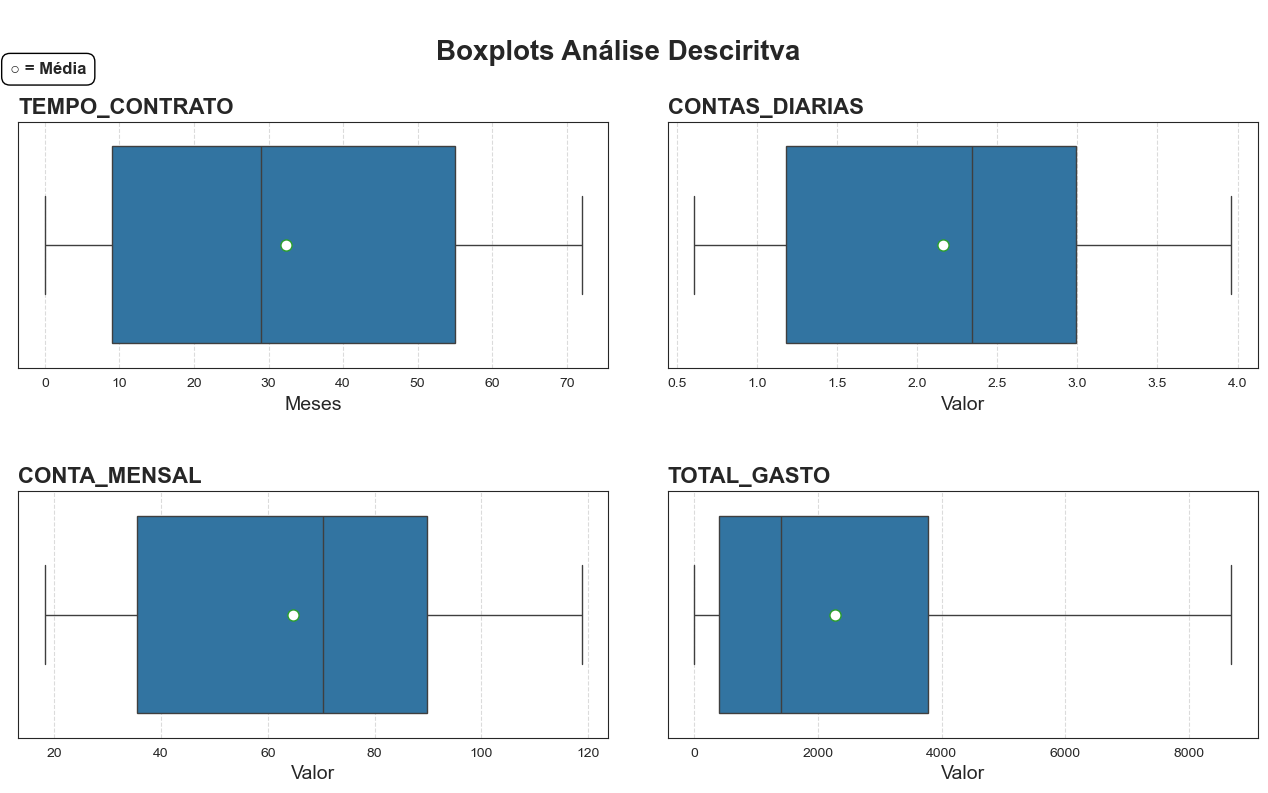

In [85]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.1)
fig.suptitle('\nBoxplots Análise Desciritva', fontsize = 20,  fontweight = 'bold', y=1.02)

for i, k in zip(axs.ravel(), colunas):
    sns.boxplot(
        data = df,
        x = k,
        ax = i,
        showmeans=True,
        meanprops={'marker':'o', 'markerfacecolor':'white', 'markersize':'8'})
    
    i.set_title(f'{k.upper()}', fontsize = 16, fontweight = 'bold', loc = 'left')
    i.grid(axis='x', linestyle='--', alpha=0.7)


fig.text(
    0.12,  # Posição x (0=esquerda, 1=direita)
    0.94,  # Posição y (0=base, 1=topo)
    "○ = Média", 
    fontsize=12, 
    fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

axs[0,0].set_xlabel('Meses', fontsize = 14)
axs[0,1].set_xlabel('Valor', fontsize = 14)
axs[1,0].set_xlabel('Valor', fontsize = 14)
axs[1,1].set_xlabel('Valor', fontsize = 14)

plt.show()

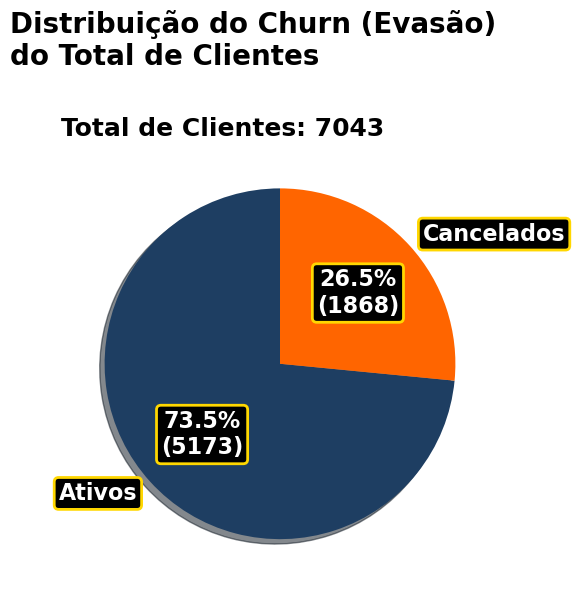

In [54]:
fig, ax = plt.subplots(figsize = (18, 6))
fig.suptitle('Distribuição do Churn (Evasão)\ndo Total de Clientes', fontsize = 20, fontweight = 'bold', x=0.35,  ha='left')

ax.pie(df['churn'].value_counts(),
        labels = df['churn'].value_counts().index.map({False : 'Ativos', True : 'Cancelados'}),
        autopct = lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(df['churn'].value_counts()))})',
        startangle = 90,
        colors=['#1E3E62','#FF6500'],
        shadow = True,
        textprops = {
            'color' : 'white',
            'fontsize' : 16,
            'fontweight': 'bold',
            'bbox': { 
                    'boxstyle': 'round',
                    'edgecolor': 'gold',
                    'facecolor': 'black',
                    'linewidth': 2,
                    'pad': 0.2
            }           
        }    
       )

ax.set_title(f'\nTotal de Clientes: {df.ID_cliente.count()}', fontsize = 18, loc = 'left', fontweight = 'bold')
plt.tight_layout()

plt.show()

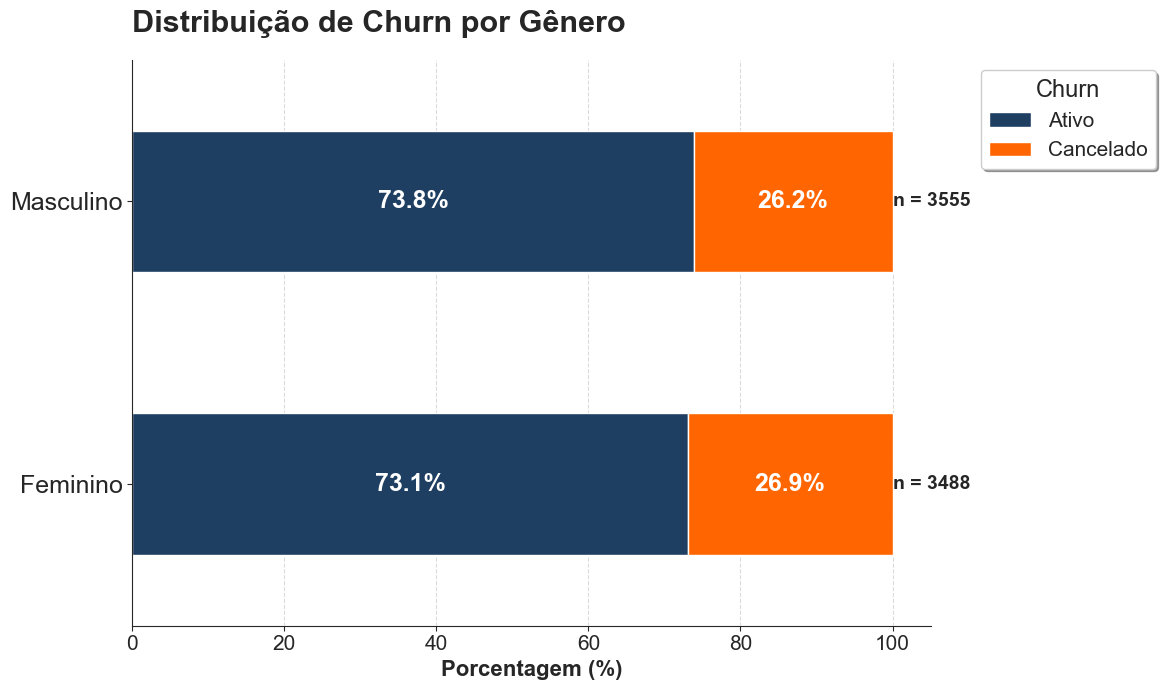

In [55]:
sns.set_style("ticks")

fig, ax = plt.subplots(figsize = (14, 7))

cont = df.groupby(['genero', 'churn']).size().unstack()
percent = cont.div(cont.sum(axis = 1), axis = 0) * 100
total = cont.sum(axis = 1) 

percent.plot(kind='barh', stacked=True, color=['#1E3E62', '#FF6500'], ax=ax)

ax.set_title('Distribuição de Churn por Gênero', fontsize = 22, pad = 20, loc = 'left', fontweight = 'bold')
ax.set_xlabel('Porcentagem (%)', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize = 18)
ax.xaxis.set_tick_params(labelsize=15)
ax.grid(axis='x', linestyle='--', alpha=0.7)

leg = ax.legend(title='Churn', 
               labels=['Ativo', 'Cancelado'], 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left',
               frameon=True,
               title_fontsize=17, 
               prop={'size':15}, 
               shadow=True)

for i, (idx, row) in enumerate(percent.iterrows()):
    ax.text(
        100.1,  
        i,    
        f'n = {total[idx]}',  
        va='center',            
        ha='left',              
        fontsize=14,
        fontweight='bold'
    )

for i, (idx, row) in enumerate(percent.iterrows()):
    acumulado = 0
    for churn, val in row.items():
        if val > 0:
            ax.text(acumulado + val/2, i, f'{val:.1f}%', 
                   ha='center', va='center', 
                   color='white', fontweight='bold', fontsize=18)
            acumulado += val


ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

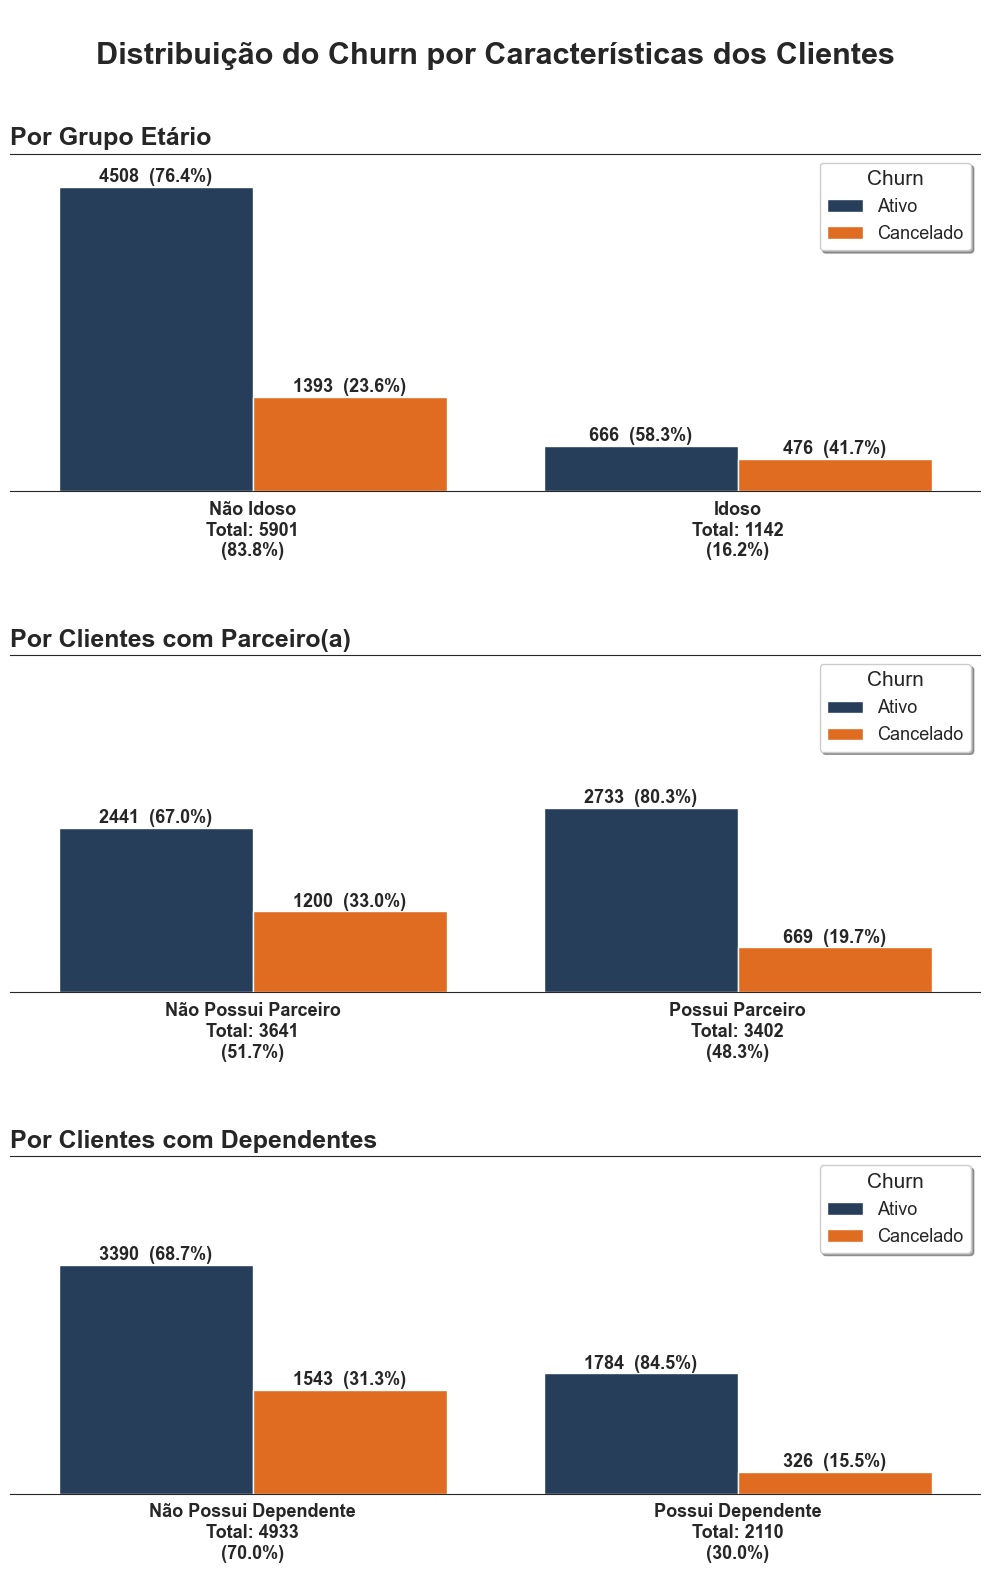

In [76]:
sns.set_style("white")

fig, axs = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('\nDistribuição do Churn por Características dos Clientes\n', fontsize=22, fontweight='bold')

rotulos = [
    {True: 'Idoso', False: 'Não Idoso'},
    {True: 'Possui Parceiro', False: 'Não Possui Parceiro'},
    {True: 'Possui Dependente', False: 'Não Possui Dependente'}
]

for i, k in zip([0, 1, 2], ['idoso', 'possui_parceiro', 'possui_dependentes']):
    sns.countplot(
        x=k,
        hue='churn',
        data=df,
        palette={True: '#FF6500', False: '#1E3E62'},
        ax=axs[i]
    )

    totais_grupo = df.groupby(k).size()

    for p in axs[i].patches:
        alt = int(p.get_height())
        if alt > 0:
            categoria = p.get_x() < 0.5  
            total_grupo = totais_grupo[not(categoria)]
            porcentagem = (alt / total_grupo) * 100

            texto = f'{alt}  ({porcentagem:.1f}%)'

            axs[i].annotate(texto, 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', 
                       xytext=(0, 7), 
                       textcoords='offset points',
                       fontsize=13,
                       fontweight='bold')

    axs[i].set_ylim(0, 5000)
    axs[i].spines[['left', 'right']].set_visible(False)
    axs[i].legend(title='Churn', title_fontsize=15, prop={'size': 13}, labels=['Ativo', 'Cancelado'], shadow=True)
    
    xticklabels = []
    for x in axs[i].get_xticklabels():
        label_text = x.get_text()
        if label_text == 'True':
            bool_val = True
        elif label_text == 'False':
            bool_val = False
        else:
            bool_val = label_text  
        
        rotulo_formatado = rotulos[i].get(bool_val, label_text)
        
        total = totais_grupo[bool_val]
        porcent_total = (total / len(df)) * 100
        xticklabels.append(f"{rotulo_formatado}\nTotal: {total}\n({porcent_total:.1f}%)")
    
    axs[i].set_xticklabels(xticklabels, fontsize=13, fontweight='bold')
    axs[i].set_yticklabels('')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('') 

axs[0].set_title('\nPor Grupo Etário', fontsize=18, loc='left', fontweight='bold')
axs[1].set_title('\n\nPor Clientes com Parceiro(a)', fontsize=18, loc='left', fontweight='bold')
axs[2].set_title('\n\nPor Clientes com Dependentes', fontsize=18, loc='left', fontweight='bold')

plt.tight_layout()
plt.show()

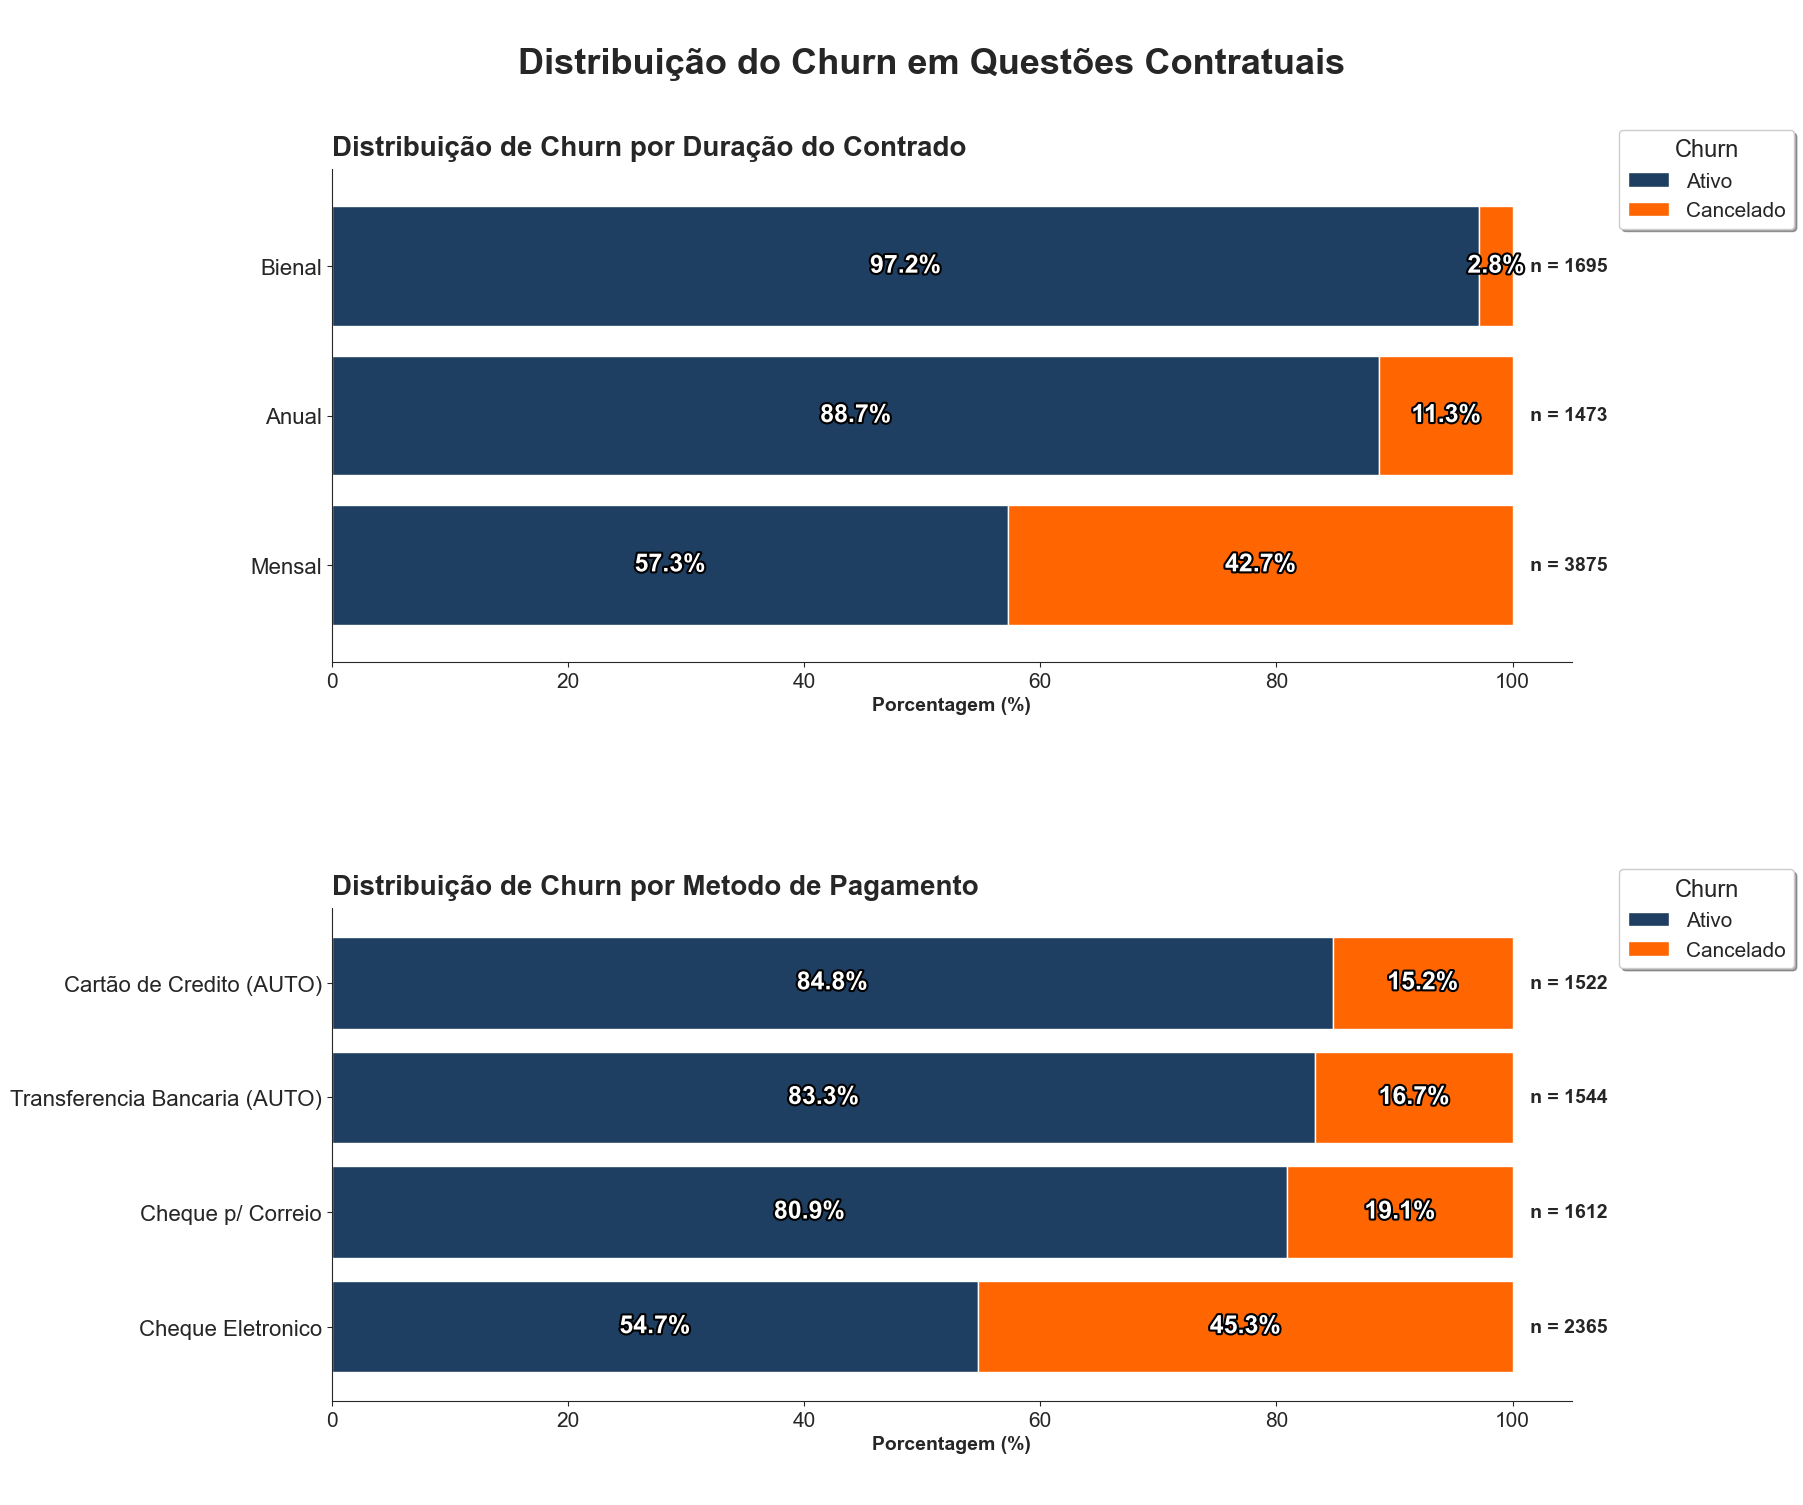

In [57]:
sns.set_style("ticks")

fig, axs = plt.subplots(2,1, figsize = (16, 16)) 
fig.suptitle('\nDistribuição do Churn em Questões Contratuais\n', fontsize = 26, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.5)

for i, k, z in zip([0,1],
                ['tipo_contrato', 'metodo_pagamento'],
                ['Distribuição de Churn por Duração do Contrado', 'Distribuição de Churn por Metodo de Pagamento']):
    
    cont = df.groupby([k, 'churn']).size().unstack()
    percent = cont.div(cont.sum(axis = 1), axis = 0) * 100
    total = cont.sum(axis = 1)

    percent = percent.sort_values(True, ascending = False)

    percent.plot(kind='barh', stacked=True, color=['#1E3E62', '#FF6500'],  width=0.8, ax=axs[i])

    axs[i].set_title(z, fontsize=20, pad = 10, loc = 'left', fontweight = 'bold' )
    axs[i].set_xlabel('Porcentagem (%)\n\n', fontsize=14, fontweight = 'bold')
    axs[i].set_ylabel('')
    axs[i].yaxis.set_tick_params(labelsize=16)
    axs[i].xaxis.set_tick_params(labelsize=15)
    axs[i].spines[['top', 'right']].set_visible(False)

    leg = axs[i].legend(title='Churn', 
               labels=['Ativo', 'Cancelado'], 
               bbox_to_anchor=(1.03, 1.1), 
               loc='upper left',
               frameon=True,
               title_fontsize=17, 
               prop={'size':15}, 
               shadow=True)
    
    for j, (idx, row) in enumerate(percent.iterrows()):
            axs[i].text(
                100.1,  
                j,    
                f'   n = {total[idx]}',  
                va='center',            
                ha='left',              
                fontsize=14,
                fontweight='bold'
            )



    for j, (idx, row) in enumerate(percent.iterrows()):
        acumulado = 0
        for churn, val in row.items():
            if val > 0:
                text = axs[i].text(acumulado + val/2, j, f'{val:.1f}%', 
                        ha='center', va='center', 
                        color='white', fontweight='bold', fontsize=18,
                        path_effects=[
                            path_effects.Stroke(linewidth=3, foreground='black'),  
                            path_effects.Normal()  
                        ])
                acumulado += val
                

plt.show()

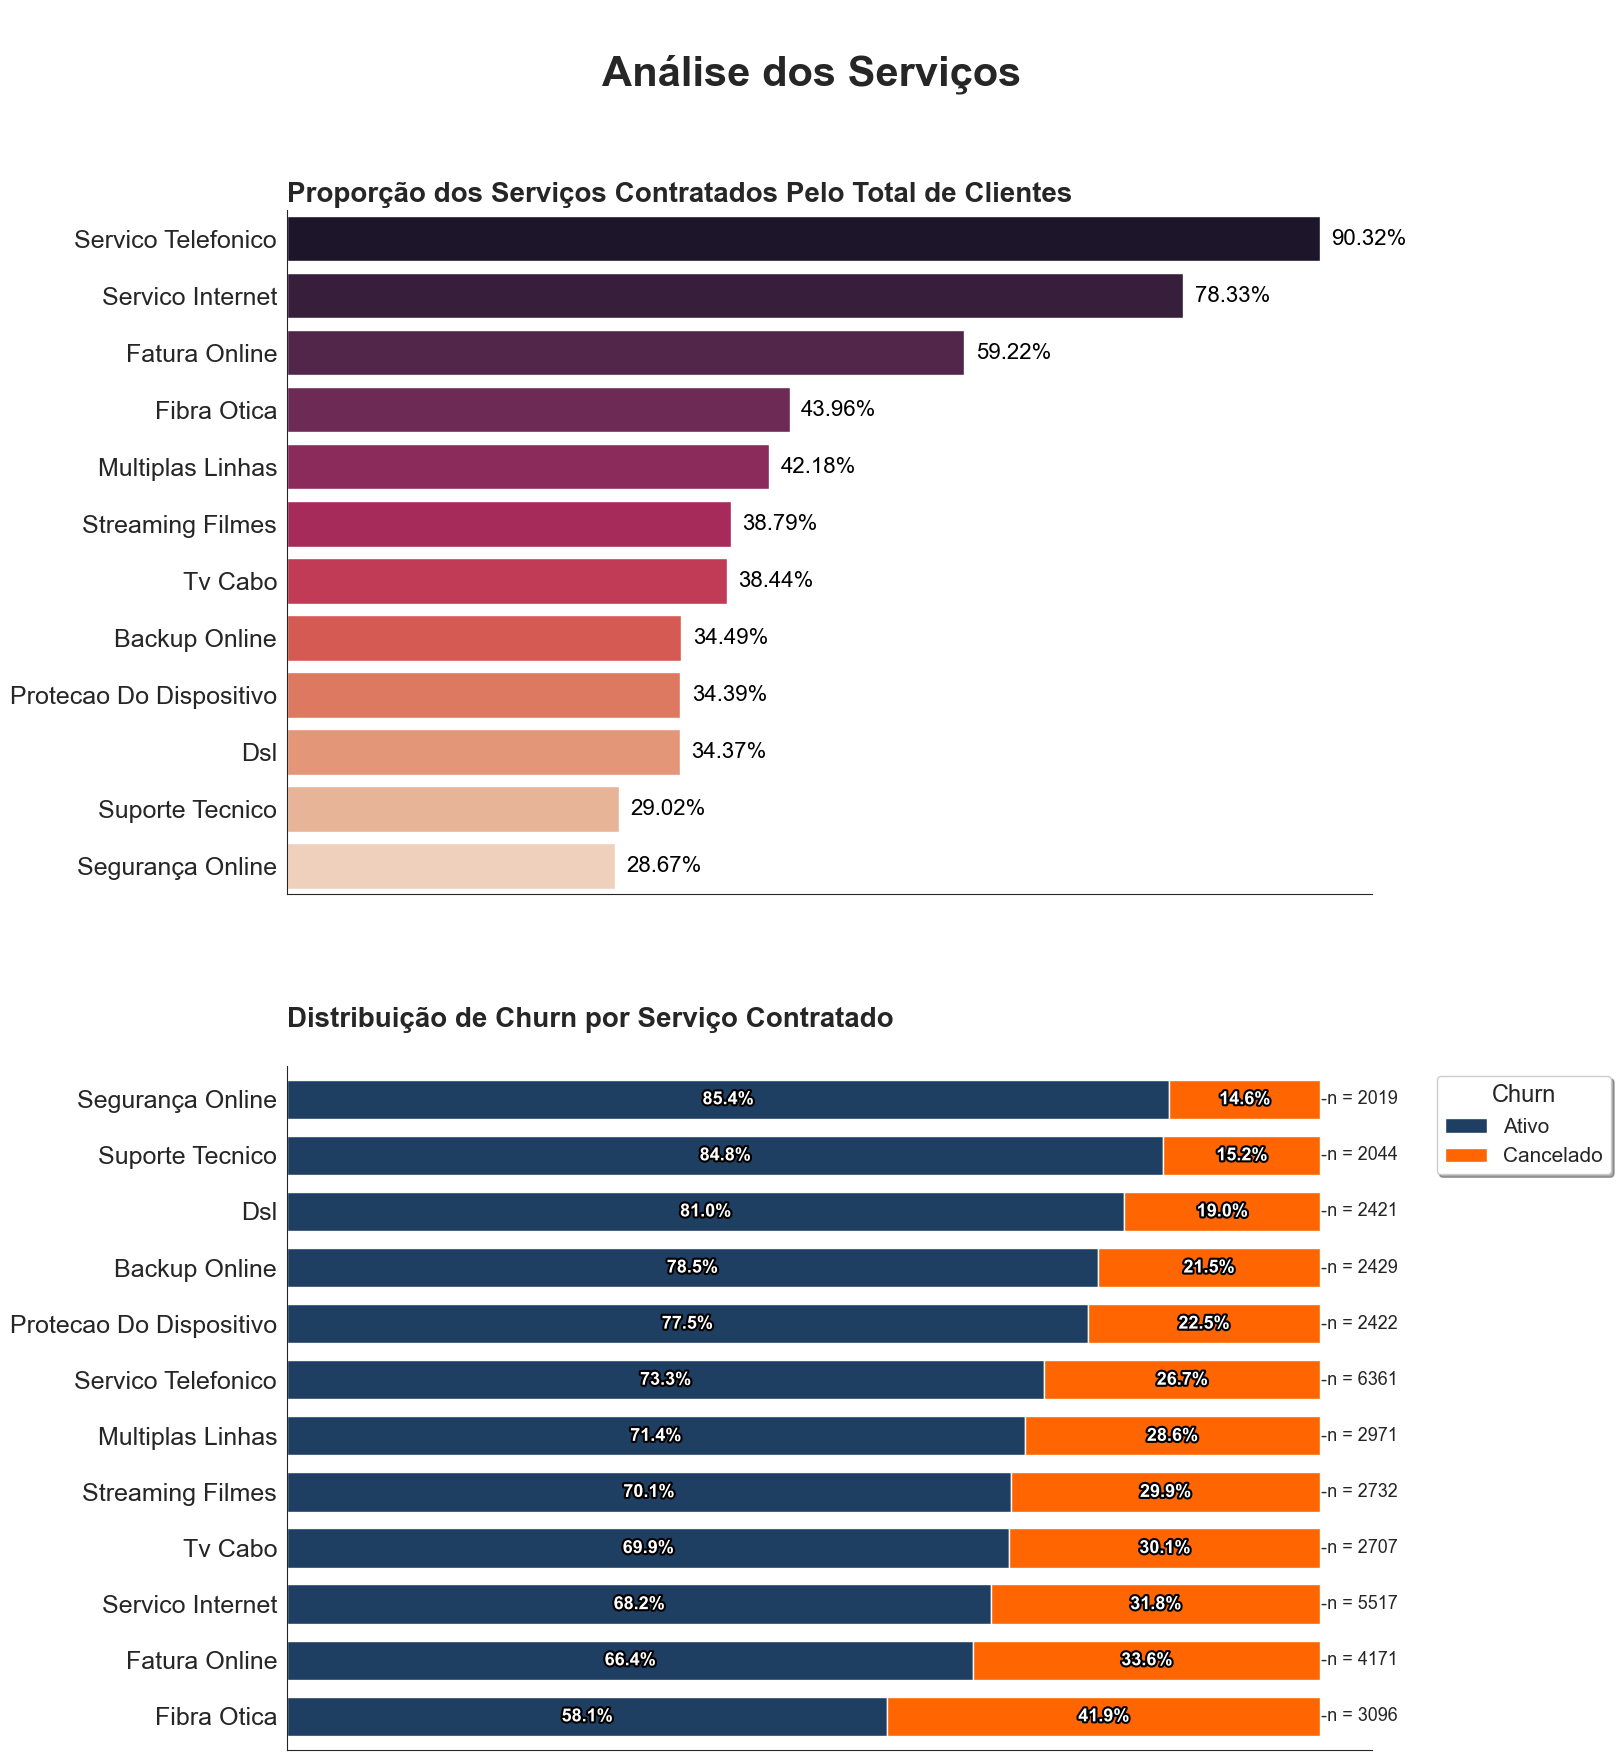

In [58]:
sns.set_style('white')

fig, axs = plt.subplots(2,1, figsize = (14,20))
fig.suptitle('\nAnálise dos Serviços', fontsize = 30, fontweight='bold')
fig.subplots_adjust(hspace=0.25)

servicos = ['servico_telefonico', 'multiplas_linhas', 'servico_internet', 'DSL', 
            'fibra_otica', 'segurança_online', 'backup_online', 'protecao_do_dispositivo',
            'suporte_tecnico', 'TV_cabo', 'streaming_filmes', 'fatura_online']


frequencia_servicos = df[servicos].mean().sort_values(ascending = False)

proporcao = df[servicos].mean().sort_values(ascending = False)

resultados = []
for servico in servicos:
    subset = df[df[servico] == True]
    total = len(subset)
    if total > 0:
        churn_sim = len(subset[subset['churn'] == True]) / total * 100
        churn_nao = len(subset[subset['churn'] == False]) / total * 100
    else:
        churn_sim = 0
        churn_nao = 0
    
    resultados.append({
        'Serviço': servico.replace('_', ' ').title(),
        'Cancelado': churn_sim,
        'Ativo': churn_nao,
        'Total': total
    })

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Cancelado', ascending= False)


sns.barplot(
    x = frequencia_servicos.values,
    y = frequencia_servicos.index,
    hue = frequencia_servicos.index,
    palette = "rocket",
    dodge = False,
    legend = False,
    ax = axs[0]
)

df_resultados.plot(
    kind = 'barh', 
    x = 'Serviço', 
    y = ['Ativo', 'Cancelado'],
    stacked = True,
    color = ['#1E3E62', '#FF6500'],
    width = 0.7,
    ax = axs[1]
)

for i, v in enumerate(frequencia_servicos.values):
    axs[0].text(v + 0.01, i, f'{v:.2%}', color='black', va='center', fontsize = 16)

for i, total in enumerate(df_resultados['Total']):
    axs[1].text(100.1, i, f'-n = {total}', va='center', fontsize=13)

for i, (idx, row) in enumerate(df_resultados.iterrows()):
    acumulado = 0
    for col in ['Ativo', 'Cancelado']:
        val = row[col]
        if val > 0:
            axs[1].text(acumulado + val/2, i, f'{val:.1f}%', 
                   ha='center', va='center', 
                   color='white', fontweight='bold', fontsize=13,
                   path_effects=[
                            path_effects.Stroke(linewidth=3, foreground='black'),  
                            path_effects.Normal()  
                        ])
            acumulado += val

novos_rotulos = [label.replace('_', ' ').title() for label in proporcao.index]
axs[0].set_yticklabels(novos_rotulos)
axs[0].set_title('Proporção dos Serviços Contratados Pelo Total de Clientes', fontsize = 20, fontweight='bold', loc = 'left')
axs[0].set_xlabel('Proporção de Clientes (%)', fontsize=12)
axs[0].set_ylabel('Serviços', fontsize=12)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels('')
axs[0].yaxis.set_tick_params(labelsize=18)

axs[1].set_title('\nDistribuição de Churn por Serviço Contratado\n', fontsize = 20, fontweight='bold', loc = 'left')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=18)
axs[1].xaxis.set_tick_params(labelsize=13)
axs[1].legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=17, 
               prop={'size':15}, shadow = True  )
axs[1].set_xticklabels('')

axs[0].spines[['top', 'right']].set_visible(False)
axs[1].spines[['top', 'right']].set_visible(False)

plt.show()

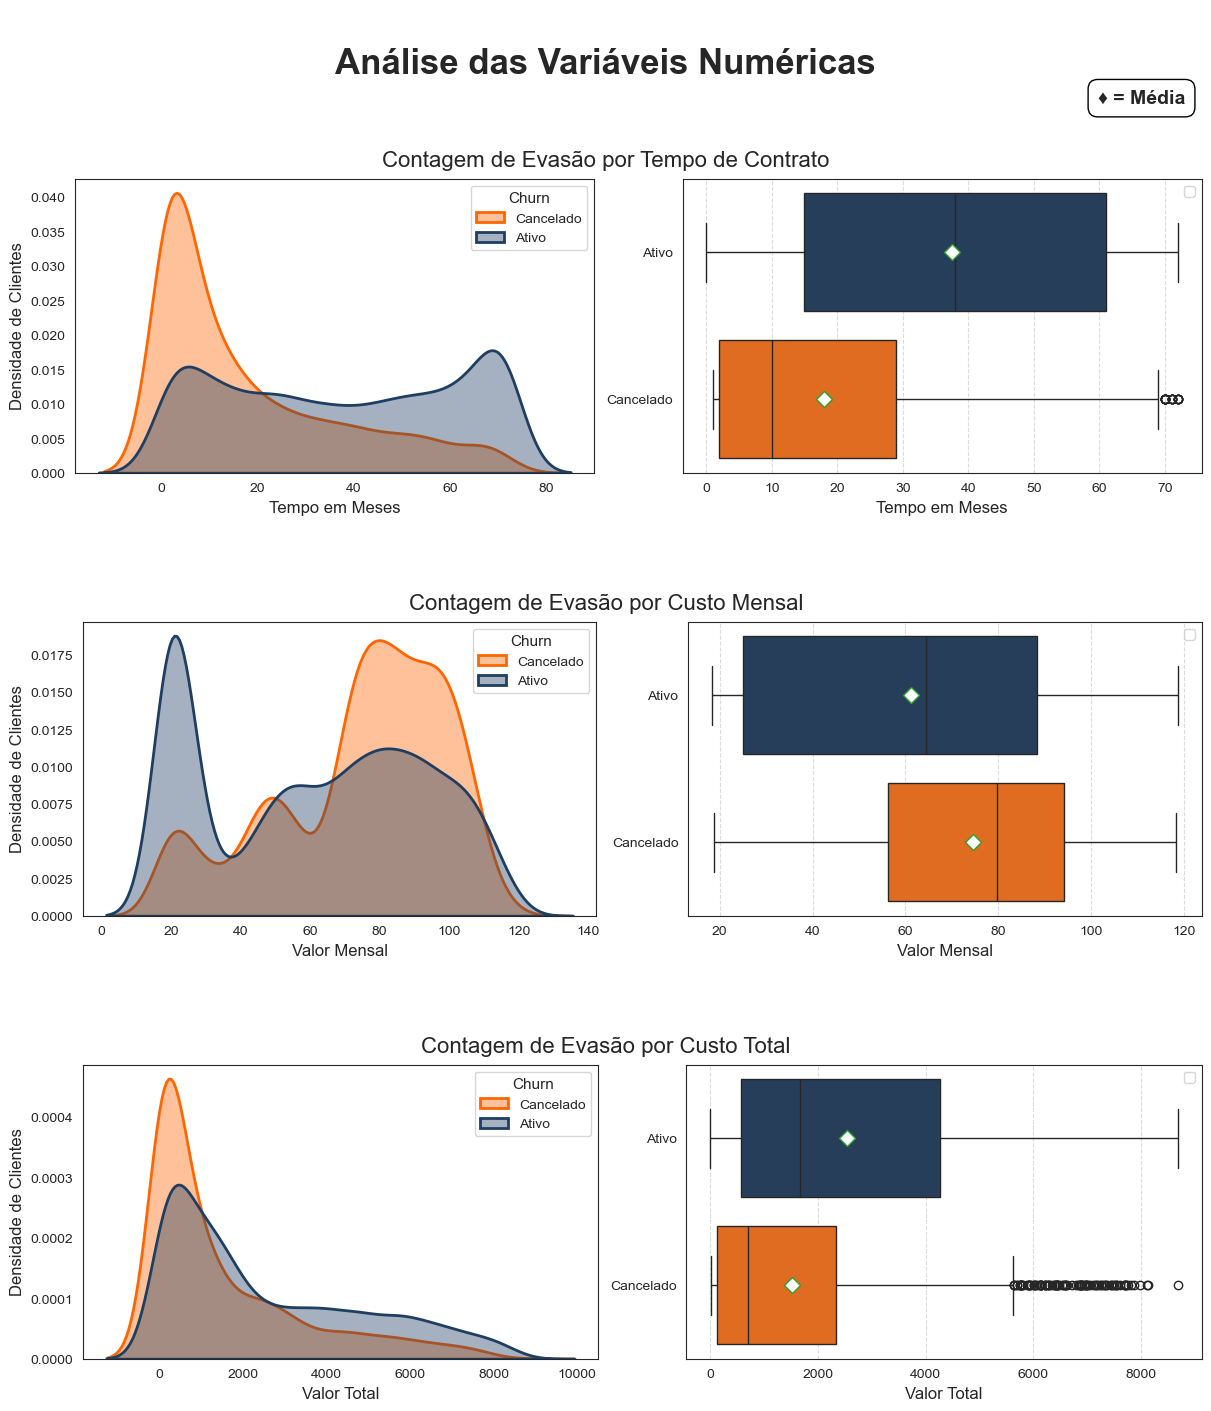

In [59]:
def eixo_x(x):
    if x == 'tempo_contrato':
        return 'Tempo em Meses'
    elif x == 'conta_mensal':
        return 'Valor Mensal'
    else:
        return 'Valor Total'

fig = plt.figure(figsize=(12, 14), constrained_layout=True)
fig.suptitle('\nAnálise das Variáveis Numéricas\n', fontsize = 25, fontweight = 'bold')

subfigs = fig.subfigures(3, 1, height_ratios=[1, 1, 1], hspace = 0.1)


nums = [0 , 1, 2]
cols = ['tempo_contrato', 'conta_mensal', 'total_gasto']
titulos =['Contagem de Evasão por Tempo de Contrato',
          'Contagem de Evasão por Custo Mensal',
          'Contagem de Evasão por Custo Total'
         ] 

for num, col, titulo in zip( nums, cols, titulos):
    axs = subfigs[num].subplots(1, 2)
    subfigs[num].suptitle(f'\n{titulo}', fontsize = 16)
    sns.kdeplot(
        data = df, 
        x = col, 
        hue ='churn', 
        fill = True, 
        palette = ['#1E3E62', '#FF6500'], 
        common_norm = False, 
        alpha = 0.4, 
        linewidth = 2,
        ax = axs[0]
        )

    sns.boxplot(
        x = col,
        y = "churn",
        hue = "churn",
        palette = ['#1E3E62', '#FF6500'],
        orient = 'h',
        data = df,
        showmeans = True,
        meanprops = {'marker':'D', 'markerfacecolor':'white', 'markersize':'8'},
        ax = axs[1]
        )
    
    axs[0].set_ylabel('Densidade de Clientes', fontsize = 12)
    axs[0].legend(title='Churn', 
               labels=['Cancelado', 'Ativo'],
               title_fontsize = 11)

    axs[1].set_yticklabels(['Ativo','Cancelado'])
    axs[1].legend('')
    axs[1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1].set_ylabel('')

    for i in [0,1]:
        axs[i].set_xlabel(eixo_x(col), fontsize = 12) 

fig.text(
    0.91,  
    0.93, 
    "♦ = Média", 
    fontsize=14, 
    fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.show()

In [60]:
df.groupby('tipo_contrato').size()

tipo_contrato
Anual     1473
Bienal    1695
Mensal    3875
dtype: int64

In [61]:
df['Mensal'] = df['tipo_contrato'] == 'Mensal'
df['Anual'] = df['tipo_contrato'] == 'Anual'
df['Bienal'] = df['tipo_contrato'] == 'Bienal'


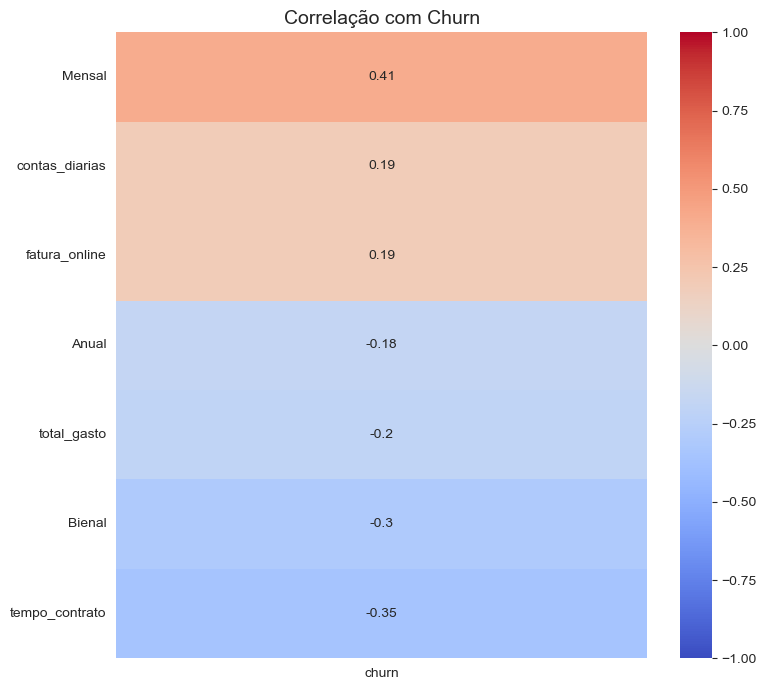

In [62]:

corr = df[['churn',
           'tempo_contrato',
           'fatura_online', 
           'contas_diarias', 
           'total_gasto', 
           'Mensal', 
           'Anual', 
           'Bienal']].corr()

alvo_corr = corr[['churn']].drop('churn').sort_values(by='churn', ascending=False)

plt.figure(figsize=(8, 7))
sns.heatmap(alvo_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlação com Churn', fontsize=14)
plt.tight_layout()
plt.show()

In [63]:
serv = ['servico_telefonico', 'multiplas_linhas', 'DSL', 'fibra_otica', 'segurança_online',
       'backup_online', 'protecao_do_dispositivo', 'suporte_tecnico', 'TV_cabo', 'streaming_filmes']

df['total_servicos'] = df[serv].sum(axis = 1)

In [64]:
df[['churn', 'total_servicos']].groupby('total_servicos').count()

,churn
total_servicos,
1,1264
2,859
3,846
4,965
5,922
6,908
7,676
8,395
9,208


<Figure size 1600x600 with 0 Axes>

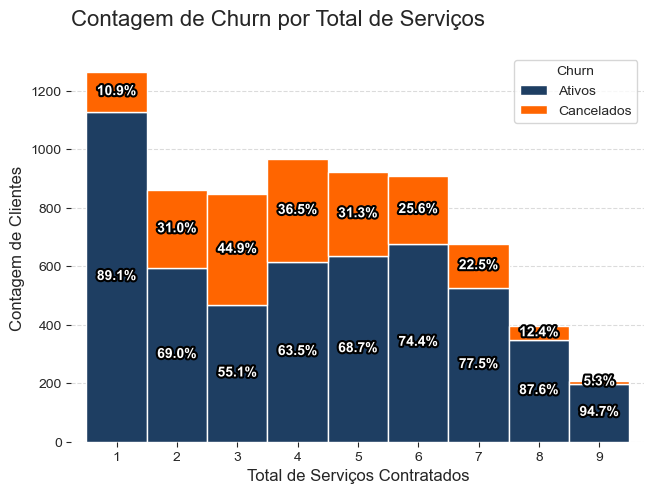

In [65]:
sns.set_style("ticks")

plt.figure(figsize=(16, 6))

count_data = df.groupby('total_servicos')['churn'].value_counts().unstack().fillna(0)
total_por_servico = count_data.sum(axis=1)
percent_data = count_data.div(total_por_servico, axis=0) * 100


ax = count_data.plot(kind='bar', stacked=True, color=['#1E3E62', '#FF6500'], width= 1)

for i, (total, ativos, cancelados) in enumerate(zip(total_por_servico, 
                                                   count_data[False], 
                                                   count_data[True])):
    if ativos > 0:
        ax.text(i, ativos/2, f'{percent_data.loc[total_por_servico.index[i], False]:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold',
                path_effects=[
                            path_effects.Stroke(linewidth=3, foreground='black'),  
                            path_effects.Normal()]
               )
    
    if cancelados > 0:
        ax.text(i, ativos + cancelados/2, f'{percent_data.loc[total_por_servico.index[i], True]:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold',
                path_effects=[
                            path_effects.Stroke(linewidth=3, foreground='black'),  
                            path_effects.Normal()]
        )

plt.title('Contagem de Churn por Total de Serviços', fontsize=16, pad=20, loc = 'left')
plt.xlabel('Total de Serviços Contratados', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.legend(['Ativos', 'Cancelados'], title='Churn')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7, linestyle='--')

ax.set_frame_on(False)

plt.tight_layout(pad=0.2)
plt.show()

# 📄 Relatório

## 🔹  Introdução 

O churn, também conhecido como evasão (no contexto de clientes) ou rotatividade (em funcionários), diz respeito à perda de elementos estratégicos em diversos cenários: clientes, colaboradores, assinantes e usuários. Sua análise é essencial para identificar padrões, causas e medir o impacto operacional e financeiro, permitindo a criação de ações preventivas e corretivas que garantam a sustentabilidade e o crescimento do negócio.

Diante disso, a Telecon_X, empresa de telecomunicações com alta taxa de churn, disponibilizou uma base de dados contendo 7.267 registros de clientes, com informações contratuais, pessoais, de serviços utilizados e status de cancelamento. A empresa solicitou uma análise exploratória para identificar os fatores associados à evasão.

## 🔹 Engenharia de Dados

### 1 Extração dos dados

Os Dados forma disponibilizados na seguinte URL : 
https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json no formato JSON foram lidos e carregado em um Data Frame.

### 2 Dicionário de dados

Os dados foram enviados na seguinte estrutura:

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

### 3 Exploração e transformação dos dados

#### 3.1 Dados Aninhados
Primeiramente foi identificado uma estrutura aninhada nos dados, sendo assim foram aplicadas tecnicas para normaliza-los e converte-los num formato tabular adequado para poder seguir com a analise exploratoria.

#### 3.2 Valores Missing

Foram identificadas 224 campos da coluna `Churn` e 11 da coluna `Charges.Total` ausentes e tiveram os seguintes tratamentos:

* Na coluna `Churn` não foi identificado nenhum padrão de substituição, deste modo optou-se por excluir os registros.
* Na coluna `Charges.Total` ao que indicava era que os valores ausentes eram de clientes que ainda nao haviam completado
  o prazo para realizar o primeiro pagamento, sendo assim os campos ausentes foram substituidos por 0 e forma mantidos os registros.

#### 3.3 Padronização dos dados

Colunas que haviam poucos valores distintos foram aplicados o `one_hot_encoding` e valores extensos como por exemplo 'No internet service', foram substitituidos por valores 'Yes' ou 'No' e posteriormente em todas as colunas onde foi possivel os valores foram transformandos em `booleanos` ou seja 'True' ou 'False'

#### 3.4 Criaçao coluna Contas_Diarias
Como solicitado foi criado a coluna `Contas_Diarias`, dividindo os valores da coluna `Charges.Monthly` por 30

#### 3.5 Traduções 
Afim de tornar o relatorio mais acessivel tantos as colunas quantos os dados foram traduzidos para o Português

### 4 Dicionário de Dados Final:

Após a extração, exploração e tratamento do Data Frame os dados ficaram na seguinte configuração:

* `ID_cliente`: número de identificação único de cada cliente
* `churn`: se o cliente deixou ou não a empresa
* `genero`: gênero (masculino e feminino)
* `idoso`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `possui_parceiro`: se o cliente possui ou não um parceiro ou parceira
* `possui_dependentes`: se o cliente possui ou não dependentes
* `servico_telefonico`: se o cliente possui serviço telefonico
* `multiplas_linhas`: se o cliente possui linha telefonica
* `servico_internet`: se o cliente possui serviço de internet
* `DSL`: se o cliente possui consexão de internet DSL
* `fibra_otica`: se o cliente possui conexão de internet Fibra Otica
* `segurança_online`: assinatura adicional de segurança online
* `backup_online`: assinatura adicional de backup online
* `protecao_do_dispositivo`: assinatura adicional de proteção no dispositivo
* `suporte_tecnico`: assinatura adicional de proteção no dispositivo
* `TV_cabo`: assinatura de TV a cabo
* `streaming_filmes`: assinatura de streaming de filmes 
* `fatura_online`: se recebe fatura online
* `tipo_contrato`: tipo de contrato
* `tempo_contrato`: duração do contrato
* `metodo_pagamento`: forma de pagamento
* `contas_diarias`: custo diario dos serviços
* `conta_mensal`: custo mensal dos serviços
* `total_gasto`: total gasto pelo cliente ate a geração do relatorio
* `Mensal`: contratos mensais
* `Anual`:  contratos anuais
* `Bienal`: contratos bienais
* `total_servicos`: total de serviços contratados

#

## 🔹 Análise Exploratória dos Dados

### 1 Análise Descritiva:

Foi observado do total de 7043 clientes uma taxa de cancelamento de 26,5% (1868). Com um tempo médio de contrato de 32 meses e gastos mensais médios de 64,76. Ja o total gasto ficou com uma média de 2.279,73 porem a mediana ficou em 1.374,55 e valor maximo de 8.684,80.

### 2 Análise por Gênero:

A distruibuição de cancelamento por genero ficou com uma distruibuição bem equitativa em todos os apectos, e demonstrando que por si só nao é uma fator relevante para evasão de clientes

### 3 Análise por Caracteristicas dos Clientes:
Na analise por grupo etario, o grupo de não idosos abrange 83,8% dos dados e sua ditruição de cancelamento se aproxima muito do geral, os idosos que representam apenas 16.2% dos dados estão com uma taxa de cancelamento de 41.7%. Entre os clientes que possuem parceiros ha uma taxa de cancelamento de 33% ja entre os que nao possuem parceiros a taxa e de 19.7%. E entre os clientes que possuem dependentes, embora sejam apenas 30% do total possuem uma taxa de cancelamento de apenas 15,5% e entre os que nao possuem dependentes essa taxa sobre para 31,3%. 

### 4 Analise por Questões Contratuais:

#### 4.1 Duração do Contrato
Nessa analise ha uma tendencia bem definida de que quanto maior a vigencia do contrato, menor a taxa de cancelamento. Sendo de 42.7% para os contratos mensais, 11.3% para os contratos anuais e de apenas 2.8% para os contratos Bienais

#### 4.1 Método de Pagamento
A forma de pagamento por cheque eletronico e a que apresenta a maior taxa de cancelamento, de 45.3%. Entre Cheque por correio, Transferencia bancaria, e Cartão de credito a evasão aparenta um comportamento simliar, sendo 19.1%, 16.7% e 15.2% respectivamente. No entanto chama atenção que Cartão de Crédito e Transferencia Bancaria são ambos formas de pagamento automaticos e aprensentam as menores taxas e são muito similares.

### 5 Análise dos Serviços

O que mais chama atenção nessa análise é que, dos 5.517 clientes (78,33%) que contratam o Serviço de Internet, há uma taxa de cancelamento de 31,8%. Do total de usuários desse serviço, 2.421 (44%) optaram por DSL, dos quais 19% cancelaram, enquanto os 3.096 (56%) que escolheram Fibra Óptica apresentam uma taxa de cancelamento de quase 42%.

### 6 Análise das Variáveis Numéricas

#### 6.1 Tempo de Contrato
50% dos cancelamentos ocorreram em até 10 meses de contrato e 75% ocoreram em menos de 30 meses e sua média ficou em torno de 19 meses. Ja entre os cliente ativos 75% estão acima de 15 meses e e possuem um média e mediana em torno de 39 meses, ou seja 50% deles estão ha mais de 39 meses.

#### 6.2 Custo Mensal
75% dos clientes ativos possuem gastos de mensais abaixo de 90 e 50% abaixo de 70. Ja entre os clientes que cancelaram 75% deles possuiam gastos mensais acima de 55 e 50% deles acima de 80.

#### 6.1 Custo Total
Como esperado clientes ativos possuem um gasto total maior que os clientes que cancelaram.

#

## 🔹 Conclusão e Recomendações

* Avaliar a acessibilidade, bem como a adequação dos serviços ofertados ao público idoso.
* Avaliar a adequação dos serviços direcionados ao público solteiro e às pessoas sem dependentes, bem como as possíveis campanhas.
* Implementar vantagens direcionadas a contratos com maior vigência e pagamentos automatizados.
* Verificar se a qualidade da fibra ótica atende aos padrões do setor e se os valores cobrados estão alinhados com a concorrência.
* Avaliar a adequação dos serviços ofertados às demandas reais dos clientes, reduzindo riscos de supercontratação e desperdício financeiro.
* Implementar análise preditiva via Machine Learning, mapeando relações ocultas entre variáveis que impactam a retenção de clientes.